In [152]:
# Point to configuration files
import sys
sys.path.append('/global/cfs/projectdirs/dune/www/data/2x2/simulation/rvizarr_dev/2x2/Thesis_2x2')
# Import python packages required for analysis
from setup import *
# Import CAF Plotting libraries
import plot_manager
importlib.reload(plot_manager)

<module 'plot_manager' from '/global/cfs/projectdirs/dune/www/data/2x2/simulation/rvizarr_dev/2x2/Thesis_2x2/plot_manager.py'>

In [158]:
CL, CR, m = 23.9818e-6, 7.6911e-6, 0.5109989461e-3 # Constants
diff_sigma = lambda Ee, Ev : 0.25*np.pi*m*(CL**2 + CL*CR*m*(m-Ee)/Ev**2 + CR**2*(-Ee+m+Ev)**2/Ev**2) # Cross section
dN_dE = lambda Ee : 3*(2*Ev+m)**3*(CL**2*Ev**2+CL*CR*m*(-Ee+m)+CR**2*(-Ee+Ev+m)**2)/(2*Ev**4*(-3*CL*CR*m*(2*Ev+m) + 3*CL**2*(2*Ev+m)**2 + CR**2*(4*Ev**2 + 6*Ev*m + 3*m**2))) # PDF
up_limit = lambda Ev : m + 2*Ev**2/(m+2*Ev) # Upper limit for energy


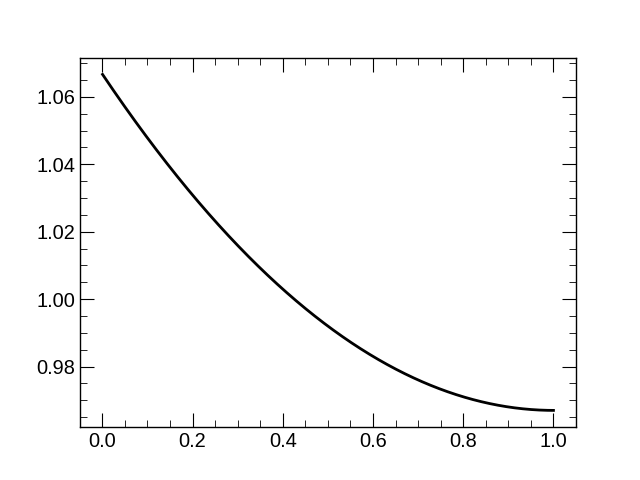
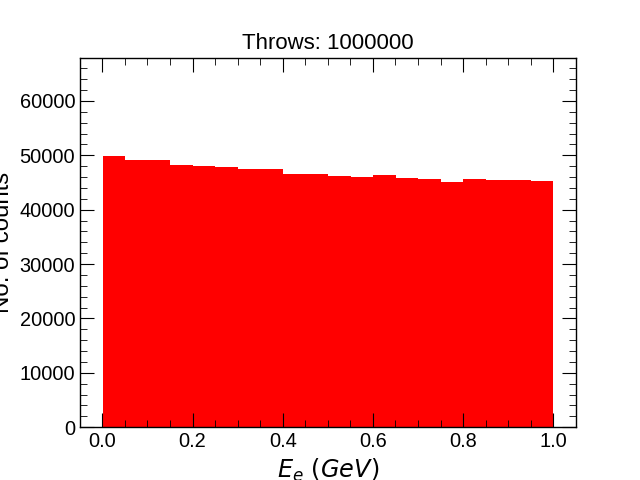


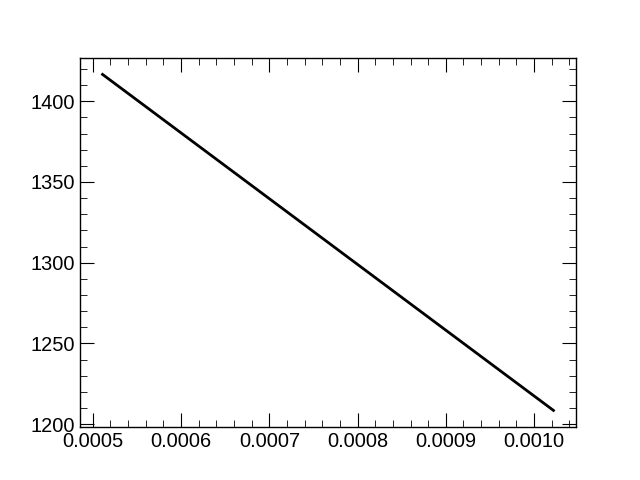
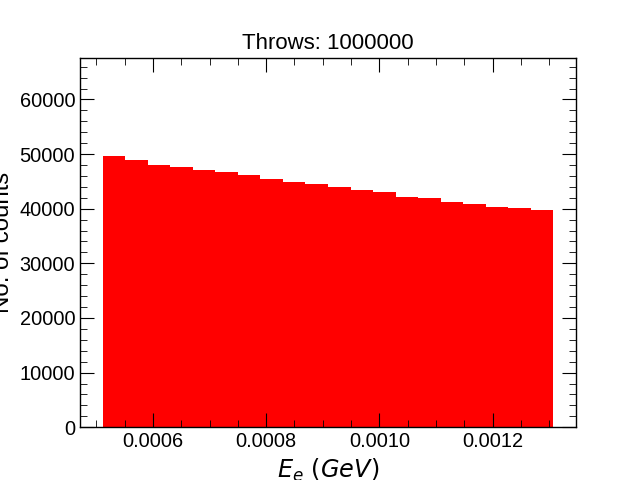

In [169]:
#################### CASE 1: E_e = 1 GeV ########################
Ev = 1 # Define neutrino energy
Ee_array = [] # Initialize array containing electron energies in desired range
throws = 1000000 # Number of throws
Ee_values = np.random.uniform(low=m, high=up_limit(Ev), size=throws) # Generate random dist of electron energies following uniform distro in desired range
max_PDF = max(dN_dE(Ee_values)) # Recover max value of PDF in desired range
uniform_dist = np.random.uniform(low=m, high=max_PDF, size=throws) # Generate random values of the PDF
# Applying accept/reject method
for u, E in zip(uniform_dist, Ee_values): 
    if u <= dN_dE(E):
        Ee_array.append(E)
# Plotting PDF and distribution of energies
plot_manager.display_plots(plot_funcs = {
    'Plot 1' : lambda : plt.plot(np.arange(m,up_limit(Ev),m), dN_dE(np.arange(m,up_limit(Ev),m))),
    'Plot 2': lambda: plot_manager.make_hist(
        data=[Ee_array], 
        bins=20, 
        range=(m, up_limit(Ev)), 
        alpha=1, 
        label=[r'$\pi$'], 
        title=r'Throws: ' + str(throws), 
        xlabel=r'$E_e \ (GeV)$', 
        ylabel='No. of counts',
        legend=False,
        DUNE=False
    )
})

#################### CASE 2: E_e = 1e-3 GeV ########################
Ev = 1e-3
Ee_array = [] # Initialize array containing electron energies in desired range
throws = 1000000 # Number of throws
Ee_values = np.random.uniform(low=m, high=up_limit(Ev), size=throws) # Generate random dist of electron energies following uniform distro in desired range
max_PDF = max(dN_dE(Ee_values)) # Recover max value of PDF in desired range
uniform_dist = np.random.uniform(low=m, high=max_PDF, size=throws) # Generate random values of the PDF
# Applying accept/reject method
for u, E in zip(uniform_dist, Ee_values): 
    if u <= dN_dE(E):
        Ee_array.append(E)
# Plotting PDF and distribution of energies
plot_manager.display_plots(plot_funcs = {
    'Plot 1' : lambda : plt.plot(np.arange(m,up_limit(Ev),m), dN_dE(np.arange(m,up_limit(Ev),m))),
    'Plot 2': lambda: plot_manager.make_hist(
        data=[Ee_array], 
        bins=20, 
        range=(m, up_limit(Ev)), 
        alpha=1, 
        label=[r'$\pi$'], 
        title=r'Throws: ' + str(throws), 
        xlabel=r'$E_e \ (GeV)$', 
        ylabel='No. of counts',
        legend=False,
        DUNE=False
    )
})

In [168]:
# Verifying normalization
from scipy.integrate import quad
Ev = 1
area, error = quad(dN_dE,m,up_limit(Ev))
print("For Ev = 1GeV: ", area)
Ev = 1e-3
area, error = quad(dN_dE,m,up_limit(Ev))
print("For Ev = 1MeV: ", area)

For Ev = 1GeV:  0.9999999999999998
For Ev = 1MeV:  0.9999999999999997
